In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
train=pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")
data = pd.concat([train,test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15613.000000,1.561300e+04,15613.000000,15612.000000,15612.000000,15612.000000,1.561200e+04,1.561100e+04,15611.000000,15611.000000,15611.000000
mean,3902.754628,4.061600e+17,68.659763,48974.185242,38.541164,-90.332979,9.328824e+04,1.348718e+09,38.533519,-90.331203,0.004292
std,2253.622607,1.294140e+18,118.841586,26980.057752,5.143933,14.068225,3.143461e+05,2.316076e+07,5.175693,14.088488,0.065374
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.163455,-166.550779,0.000000
25%,1951.000000,1.800365e+14,9.610000,26041.000000,34.699875,-96.809400,7.590000e+02,1.325583e+09,34.779525,-96.937485,0.000000
50%,3903.000000,3.518669e+15,47.500000,48202.000000,39.362950,-87.461600,2.501000e+03,1.325815e+09,39.359919,-87.429817,0.000000
75%,5854.000000,4.651007e+15,81.940000,72047.000000,41.940400,-80.158000,2.047800e+04,1.371908e+09,41.955727,-80.219295,0.000000
max,7814.000000,4.992346e+18,3204.980000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371993e+09,66.645176,-66.967742,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(7815, 23)
(7798, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  15613.000000  1.561300e+04  15613.000000  15612.000000  15612.000000   
mean    3902.754628  4.061600e+17     68.659763  48974.185242     38.541164   
std     2253.622607  1.294140e+18    118.841586  26980.057752      5.143933   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%     1951.000000  1.800365e+14      9.610000  26041.000000     34.699875   
50%     3903.000000  3.518669e+15     47.500000  48202.000000     39.362950   
75%     5854.000000  4.651007e+15     81.940000  72047.000000     41.940400   
max     7814.000000  4.992346e+18   3204.980000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  15612.000000  1.561200e+04  1.561100e+04  15611.000000  15611.000000   
mean     -90.332979  9.328824e+04  1.348718e+09     38.533519    -90.331203   
std       14.068225  3.143461e+05  2.316076e+07    

In [ ]:
test.info

<bound method DataFrame.info of       Unnamed: 0 trans_date_trans_time               cc_num  \
0              0   2020-06-21 12:14:25     2291163933867244   
1              1   2020-06-21 12:14:33     3573030041201292   
2              2   2020-06-21 12:14:53     3598215285024754   
3              3   2020-06-21 12:15:15     3591919803438423   
4              4   2020-06-21 12:15:17     3526826139003047   
...          ...                   ...                  ...   
7793        7793   2020-06-23 13:01:43      377113842678100   
7794        7794   2020-06-23 13:02:09     6538891242532018   
7795        7795   2020-06-23 13:02:35        4658117080136   
7796        7796   2020-06-23 13:03:43     2720830304681674   
7797        7797   2020-06-23 13:03:50  4992346398065154184   

                                  merchant        category     amt     first  \
0                    fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                     fraud_Sporer-Keebler   person

In [ ]:
train.info

<bound method DataFrame.info of       Unnamed: 0 trans_date_trans_time            cc_num  \
0              0   2019-01-01 00:00:18  2703186189652095   
1              1   2019-01-01 00:00:44      630423337322   
2              2   2019-01-01 00:00:51    38859492057661   
3              3   2019-01-01 00:01:16  3534093764340240   
4              4   2019-01-01 00:03:06   375534208663984   
...          ...                   ...               ...   
7810        7810   2019-01-06 01:59:19  6524376634971418   
7811        7811   2019-01-06 01:59:25  2348245054386329   
7812        7812   2019-01-06 02:00:33  2283743876903625   
7813        7813   2019-01-06 02:01:43   213195754007681   
7814        7814   2019-01-06 02:02:05    30343344410970   

                                 merchant       category     amt      first  \
0              fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1         fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2         

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [ ]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(data.shape)

(7815, 28)
(7798, 28)
(15613, 28)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, trans_num, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 28 columns]
   Unnamed: 0            cc_num  merchant  category     amt      first  \
0           0  2703186189652095       514         8    4.97   Jennifer   
1           1      630423337322       241         4  107.23  Stephanie   
2           2    38859492057661       390         0  220.11     Edward   
3           3  3534093764340240       360         2   45.00     Jeremy   
4           4   375534208663984       297         9   41.96      Tyler   

      last  gender                        street            city  ...  \
0    Banks       0                561 Perry Cove  Moravian Falls  ...   
1     Gill       0  43039 Riley Greens Suite 393          Orient  ...

In [ ]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

7798
0


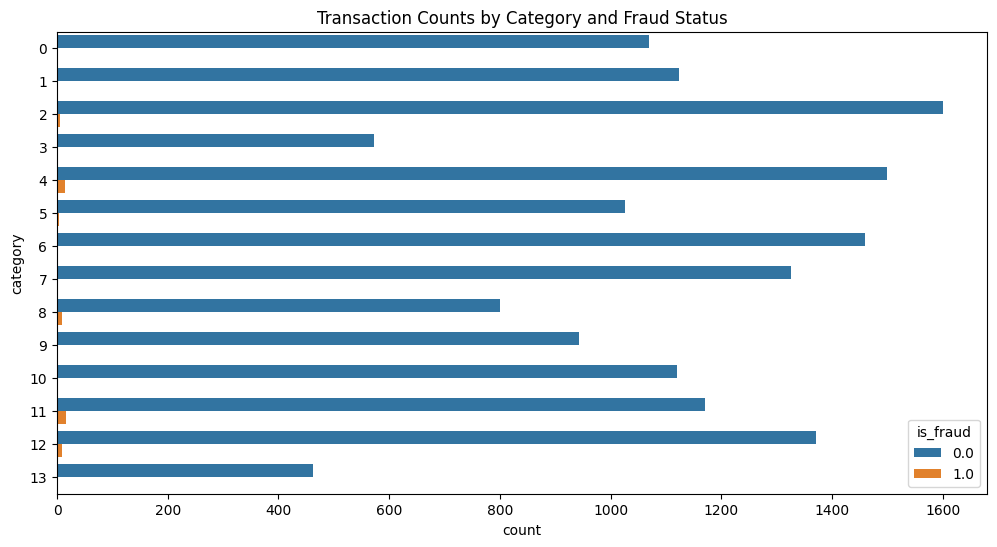

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

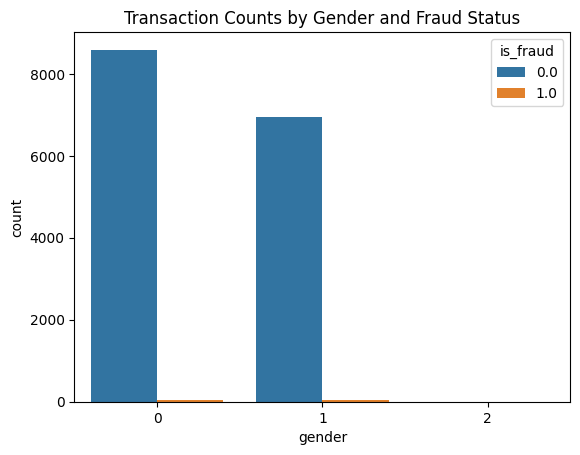

In [ ]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

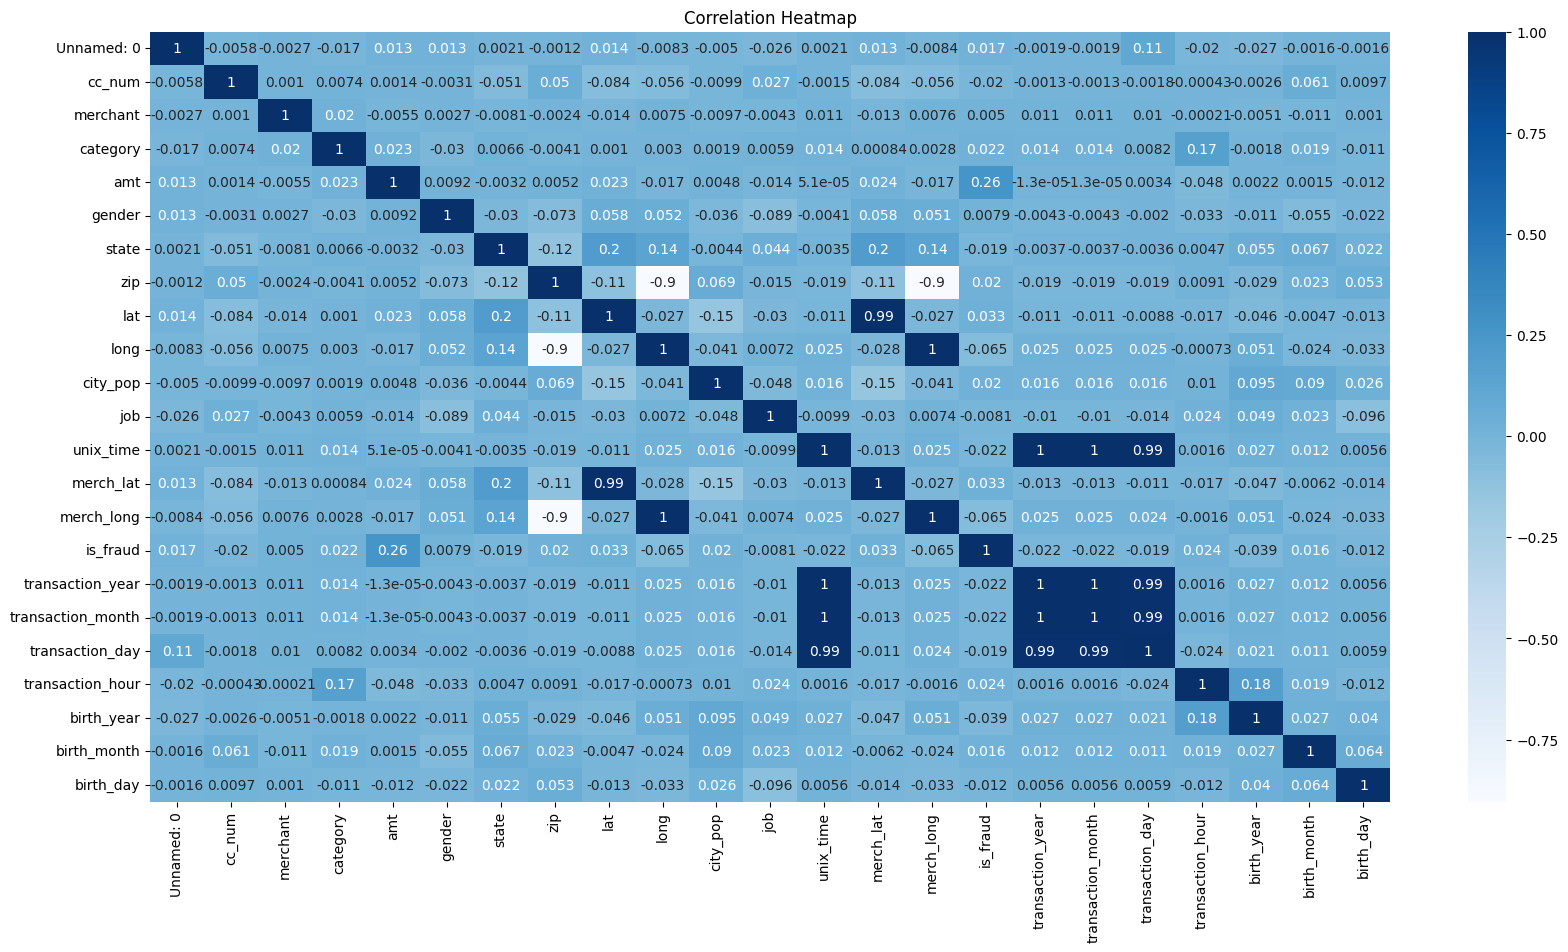

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)